In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 10,6

In [2]:
df=pd.read_csv("zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.shape

(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df["approx_cost(for two people)"].fillna("0",inplace=True)

In [6]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(",","").astype("int")

In [7]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].map(lambda x:np.nan if x=="0" else x)

In [8]:
df[["rate","rating"]]=df["rate"].str.split("/",expand=True)
df.drop(columns=["rating"],inplace=True)

In [9]:
df["rate"]=df["rate"].map(lambda x:0 if x=="NEW" or x=="-" else x)
df["rate"]=df["rate"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51717 non-null  int64  
 13  reviews_list    

In [11]:
df["rate"]=df["rate"].map(lambda x:np.nan if x==0 else x)

In [12]:
df.describe(include="all")

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,41665.000000,51717.000000,50509,51696,51490,23639,51672,51717.000000,51717,51717,51717,51717
unique,51717,11495,8792,2,2,NaN,NaN,14926,93,93,5271,2723,NaN,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NaN,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,NaN,[],[],Delivery,BTM
freq,1,128,96,30444,45268,NaN,NaN,216,5124,19132,182,2913,NaN,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,3.700449,283.697527,NaN,NaN,NaN,NaN,NaN,551.715587,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.440513,803.838853,NaN,NaN,NaN,NaN,NaN,439.717709,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.800000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.400000,7.000000,NaN,NaN,NaN,NaN,NaN,300.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.700000,41.000000,NaN,NaN,NaN,NaN,NaN,400.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.000000,198.000000,NaN,NaN,NaN,NaN,NaN,650.000000,NaN,NaN,NaN,NaN


Skewness of rate is -0.32860079817829163
Kurtosis of rate is -0.007483378127147944
Minimum value in rate is 1.8
Maximum value in rate is 4.9
Mean value in rate is 3.700448817952717
Median value in rate is 3.7
Mode value in rate is 3.9


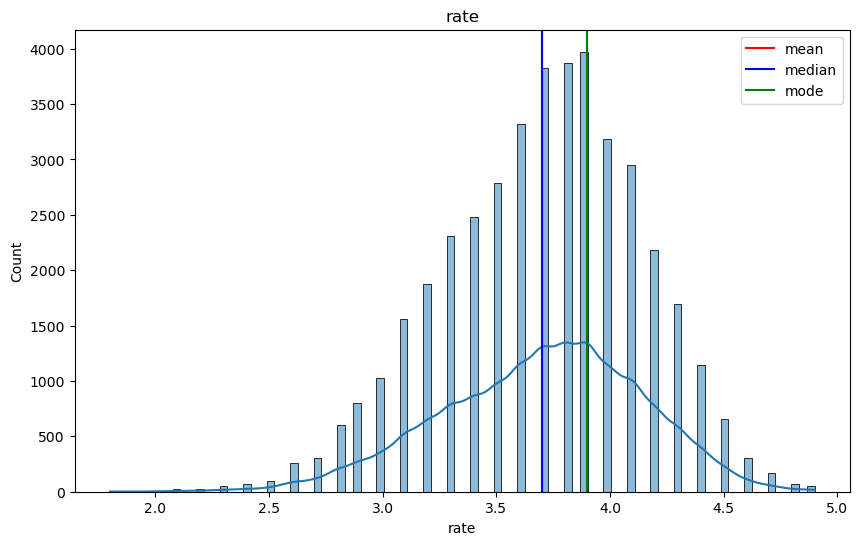

Skewness of votes is 7.547819350060049
Kurtosis of votes is 88.8667383335981
Minimum value in votes is 0
Maximum value in votes is 16832
Mean value in votes is 283.69752692538236
Median value in votes is 41.0
Mode value in votes is 0


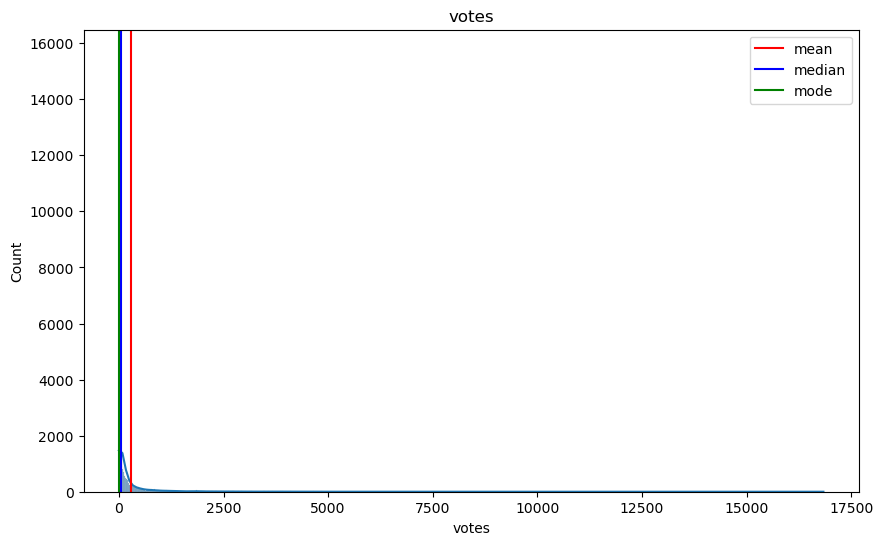

Skewness of approx_cost(for two people) is 2.581186278265623
Kurtosis of approx_cost(for two people) is 10.358700407964527
Minimum value in approx_cost(for two people) is 0
Maximum value in approx_cost(for two people) is 6000
Mean value in approx_cost(for two people) is 551.7155867509716
Median value in approx_cost(for two people) is 400.0
Mode value in approx_cost(for two people) is 300


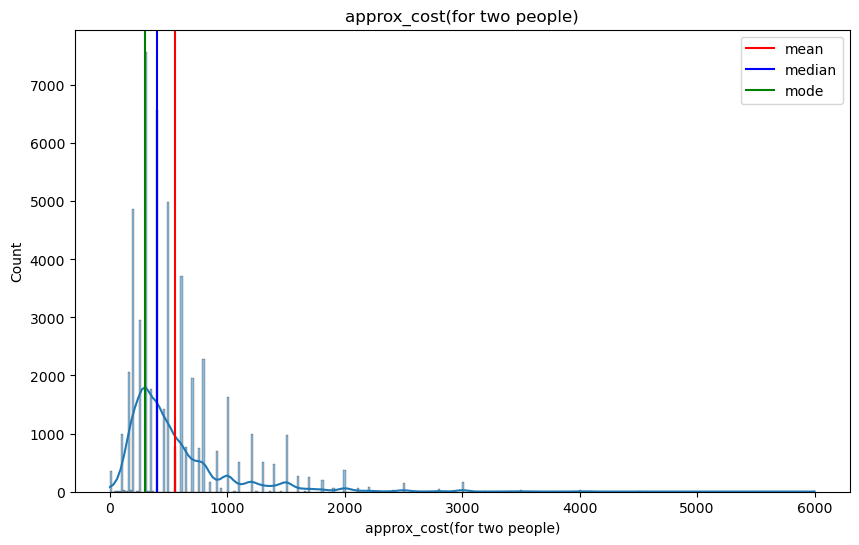

In [13]:
for i in df.select_dtypes(include=np.number):
    sns.histplot(df[i],kde=True)
    plt.axvline(x=df[i].mean(),label="mean",color="r")
    plt.axvline(x=df[i].median(),label="median",color="b")
    plt.axvline(x=df[i].mode()[0],label="mode",color="g")
    plt.legend()
    plt.title(i)
    print("Skewness of",i,"is",df[i].skew())
    print("Kurtosis of",i,"is",df[i].kurt())
    print("Minimum value in",i,"is",df[i].min())
    print("Maximum value in",i,"is",df[i].max())
    print("Mean value in",i,"is",df[i].mean())
    print("Median value in",i,"is",df[i].median())
    print("Mode value in",i,"is",df[i].mode()[0])
    plt.show()

In [14]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].median(),inplace=True)

In [15]:
for i in df.select_dtypes(exclude=np.number):
    df[i].fillna(df[i].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

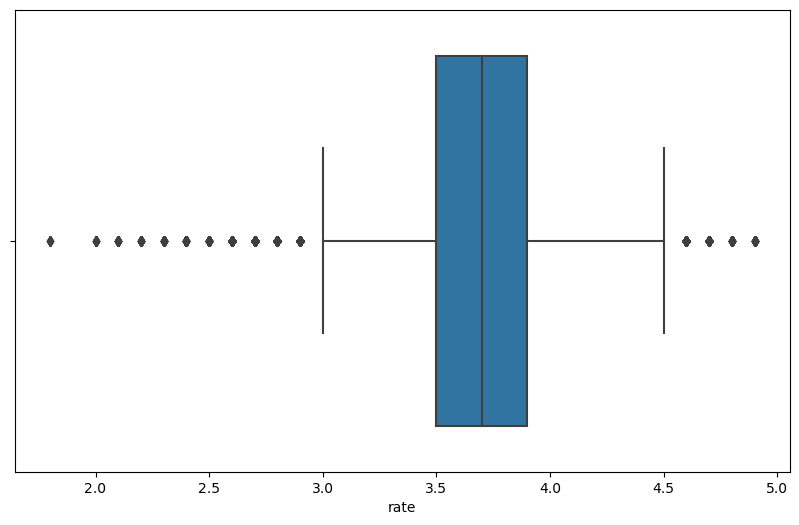

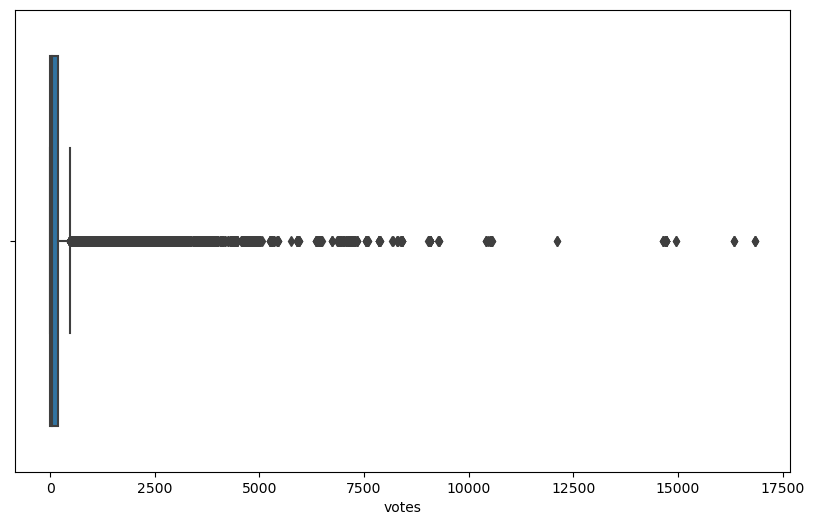

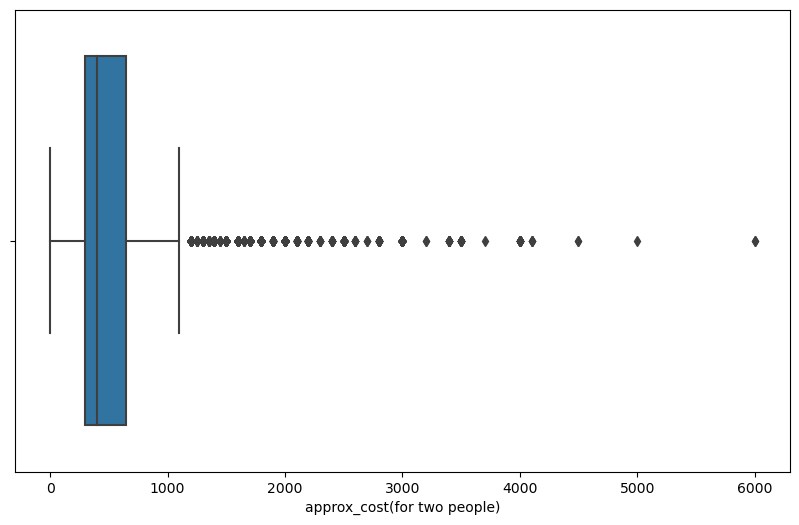

In [17]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [18]:
df1=df[["name","online_order","book_table","location","rest_type","dish_liked","cuisines","rest_type","listed_in(city)"]]

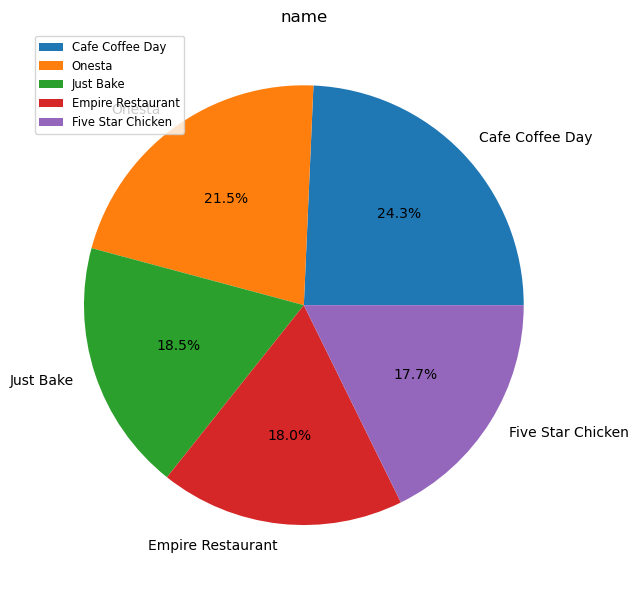

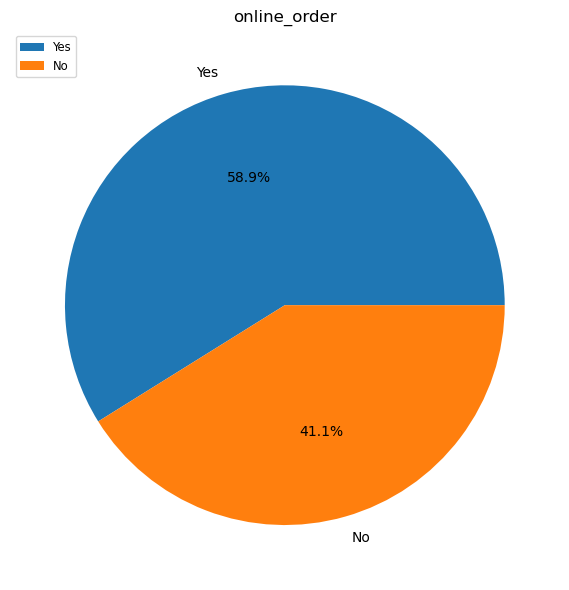

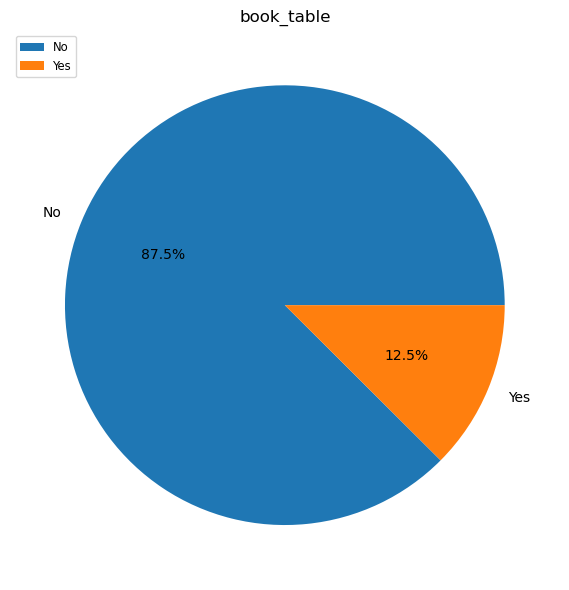

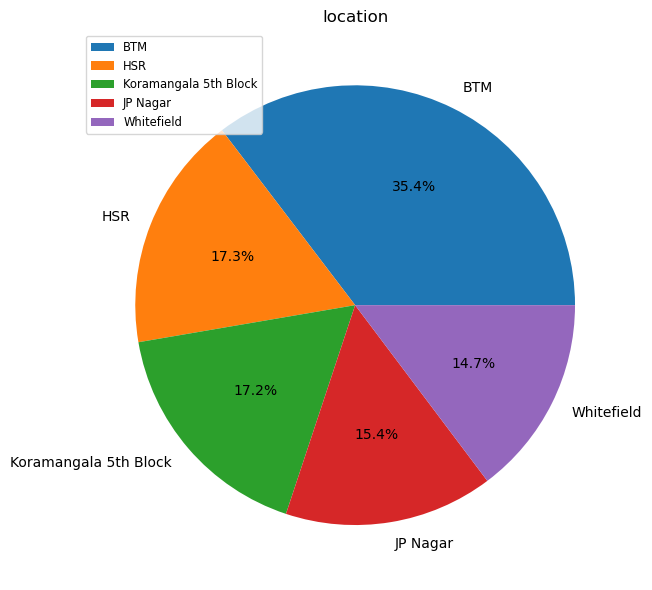

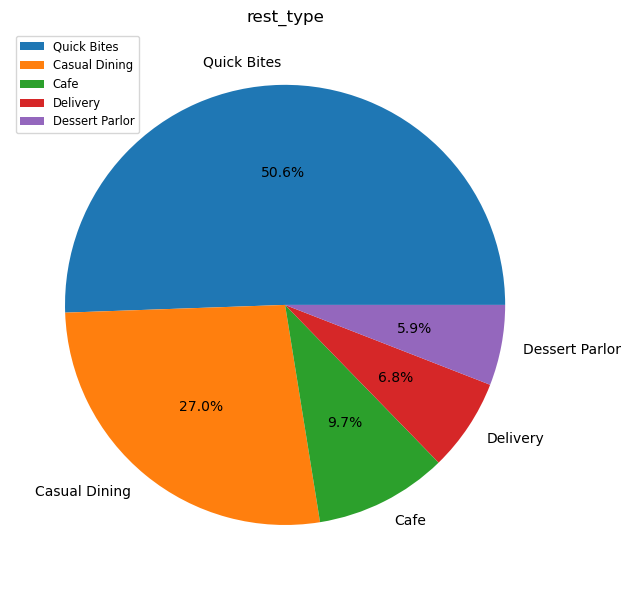

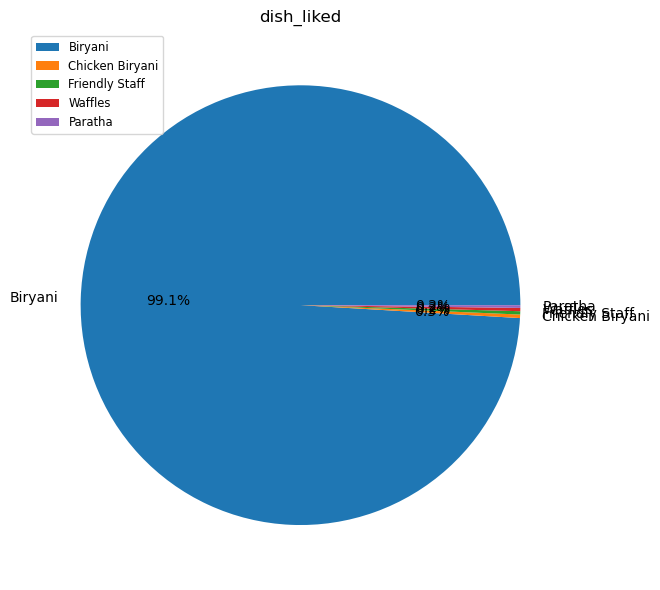

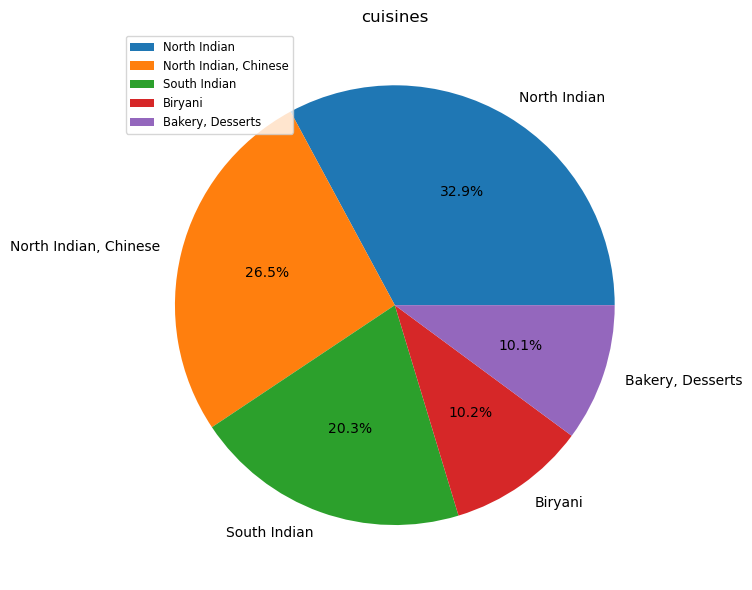

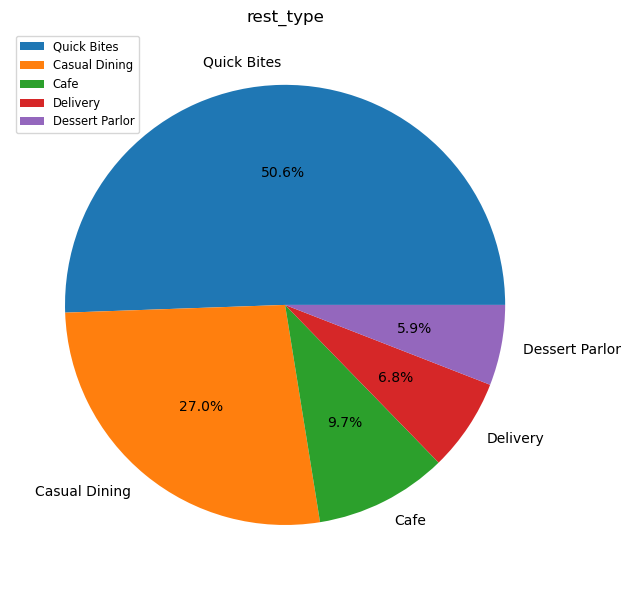

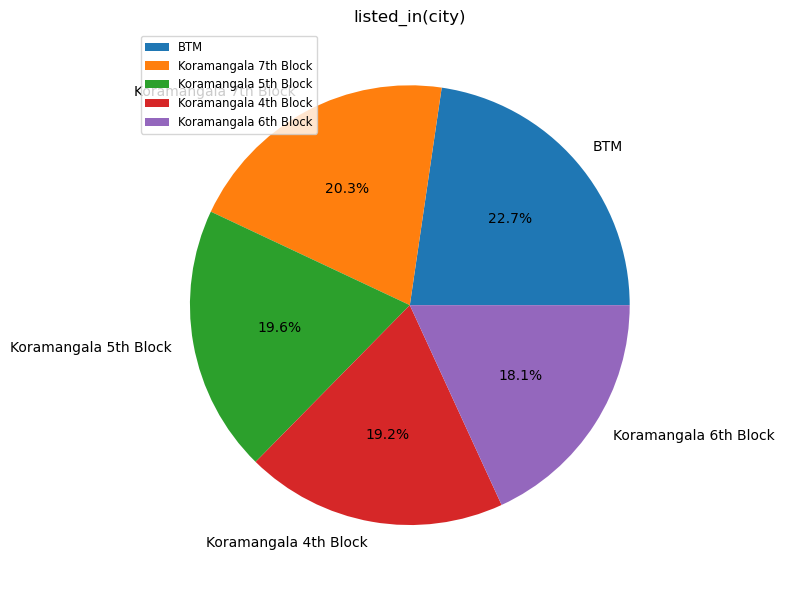

In [19]:
for i in df1.columns:
    r_counts=df[i].value_counts().head()
    plt.figure(figsize=(8, 6))
    plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
    plt.title(i)
    plt.legend(fontsize="small",loc="upper left")
    plt.tight_layout()
    plt.show()

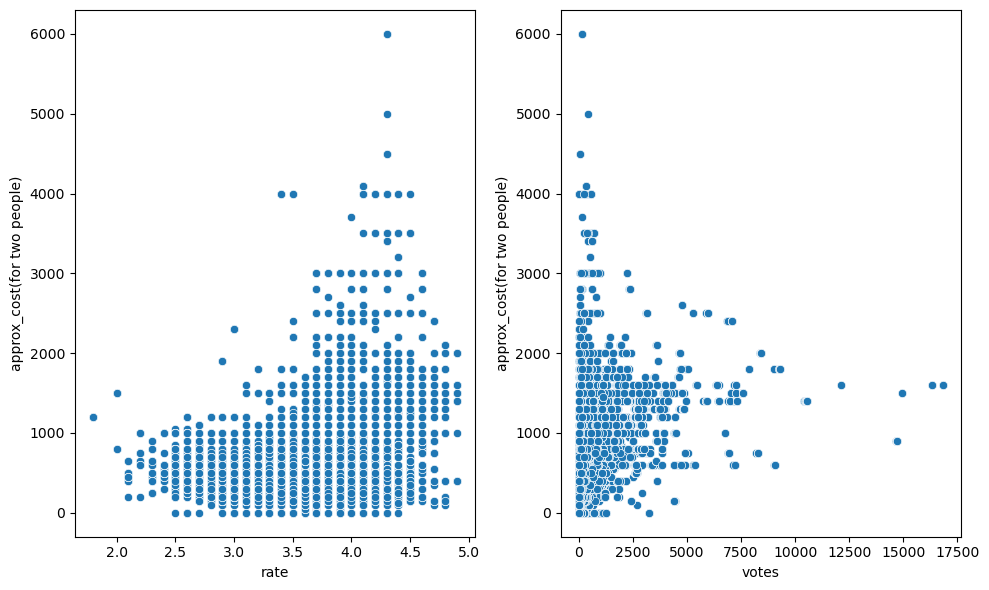

In [20]:
plt.subplot(1,2,1)
sns.scatterplot(df["rate"],df["approx_cost(for two people)"])
plt.subplot(1,2,2)
sns.scatterplot(df["votes"],df["approx_cost(for two people)"])
plt.tight_layout()
plt.show()

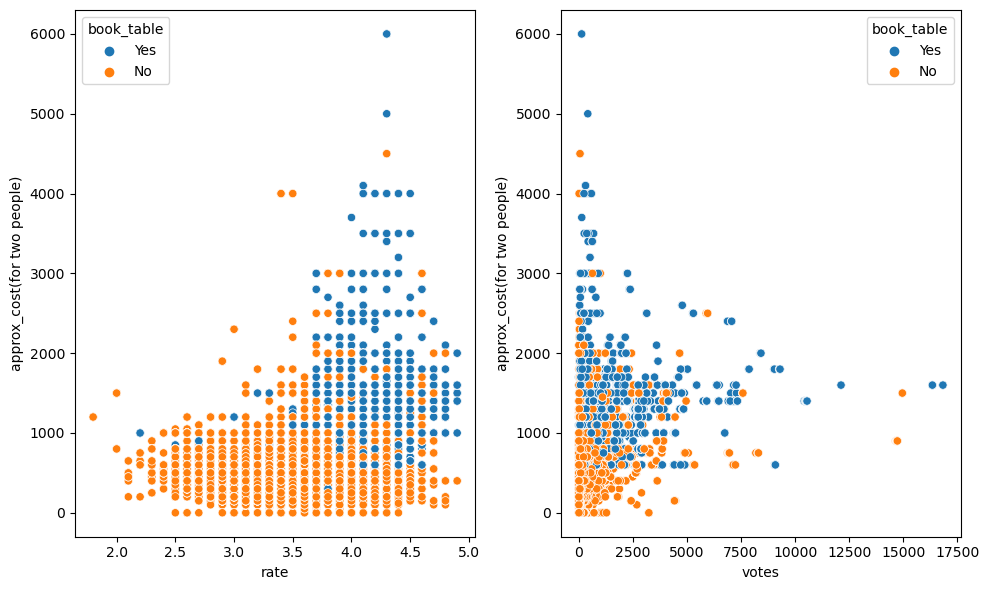

In [21]:
plt.subplot(1,2,1)
sns.scatterplot(df["rate"],df["approx_cost(for two people)"],hue=df["book_table"])
plt.subplot(1,2,2)
sns.scatterplot(df["votes"],df["approx_cost(for two people)"],hue=df["book_table"])
plt.tight_layout()
plt.show()

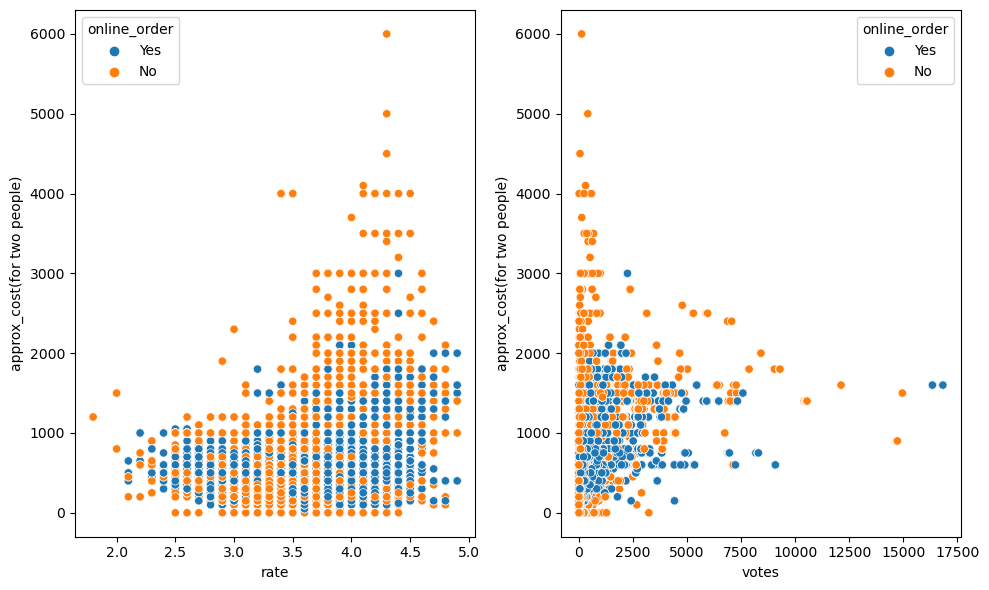

In [22]:
plt.subplot(1,2,1)
sns.scatterplot(df["rate"],df["approx_cost(for two people)"],hue=df["online_order"])
plt.subplot(1,2,2)
sns.scatterplot(df["votes"],df["approx_cost(for two people)"],hue=df["online_order"])
plt.tight_layout()
plt.show()

# Outlier Treatment
#### Considering 3 standard deviation

In [23]:
for i in df.select_dtypes(include=np.number):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    uwf=q3+1.5*iqr
    lwf=q1-1.5*iqr
    df[i]=df[i].map(lambda x: uwf if x>uwf else lwf if x<lwf else x)

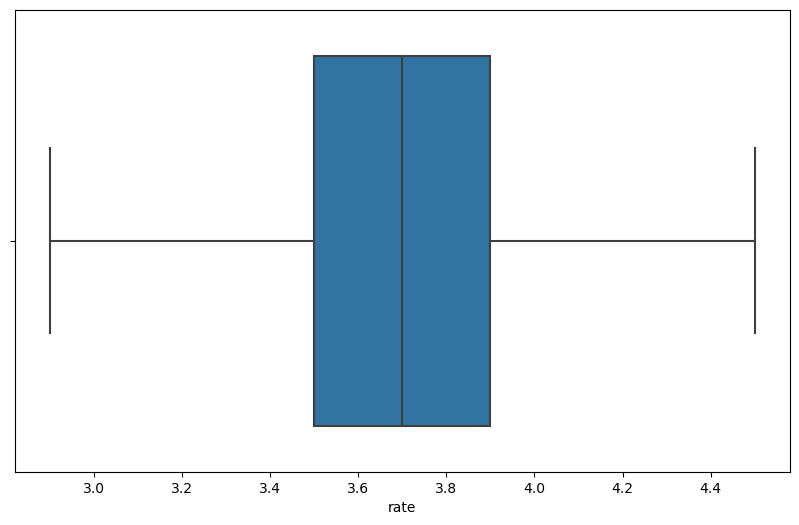

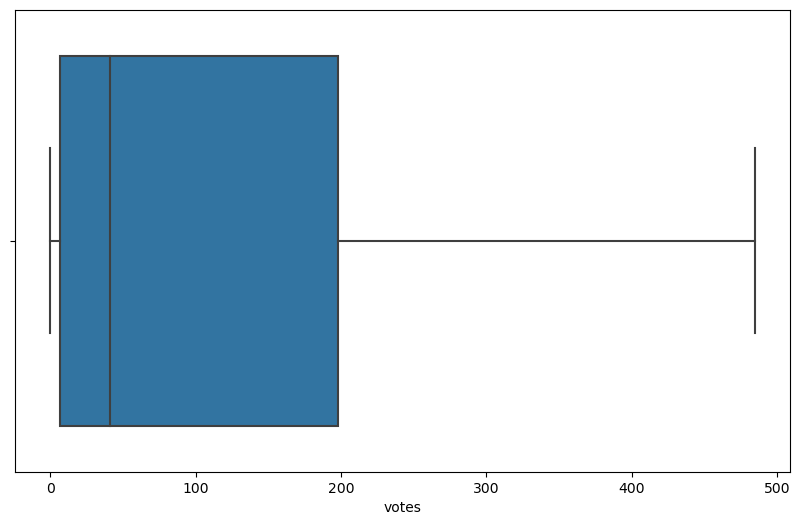

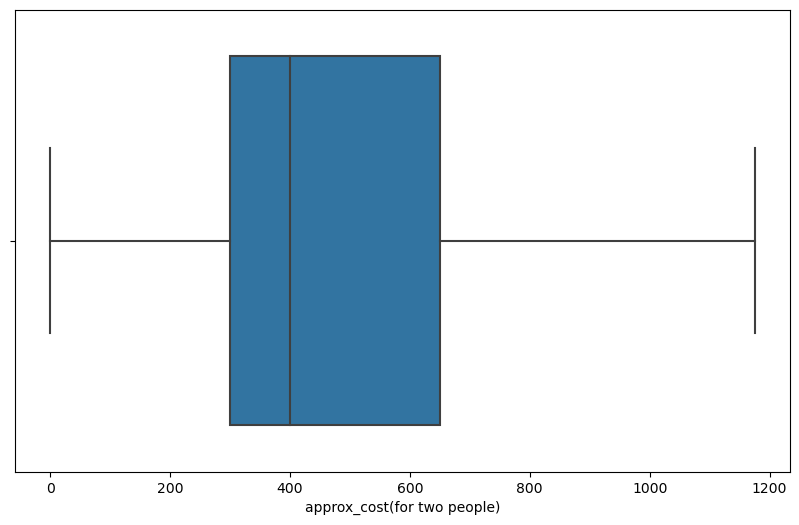

In [24]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()
# The outliers have been treated

### Feature Extraction

In [25]:
df["rate"].min(),df["rate"].max(),df["rate"].mean()

(2.9000000000000004, 4.5, 3.7052535916625806)

In [26]:
df["Location"]=df["listed_in(city)"].map(lambda x: "North" if x in ["Nagawara", "Hennur", "Kalyan Nagar", "New BEL Road", "Jakkur", "Rammurthy Nagar", "Thippasandra", "Kaggadasapura", "Hebbal", "Kengeri", "Sankey Road", "Sadashiv Nagar"] else "South" if x in ["Banashankari", "Basavanagudi", "Mysore Road", "Jayanagar", "Kumaraswamy Layout", "Rajarajeshwari Nagar", "Vijay Nagar", "Uttarahalli", "JP Nagar", "South Bangalore", "Bannerghatta Road", "BTM", "Kanakapura Road", "Bommanahalli", "Wilson Garden", "Shanti Nagar", "Koramangala 5th Block", "Koramangala 8th Block", "Richmond Road", "Koramangala 7th Block", "Jalahalli", "Koramangala 4th Block"] else "East" if x in ["Bellandur", "Whitefield", "Old Airport Road", "Indiranagar", "Marathahalli", "Sarjapur Road", "CV Raman Nagar", "Electronic City"] else "West" if x in ["Rajajinagar", "Malleshwaram", "Basaveshwara Nagar", "Yeshwantpur", "Magadi Road", "Yelahanka", "Sahakara Nagar", "Peenya"] else "Central")

In [27]:
df["Rate_Type"]=df["rate"].map(lambda x: "Average" if (x>=2.9) and (x<=3.7) else "Good")

In [28]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [29]:
df1=df.drop(columns=["url","address","name","phone","location","rest_type","dish_liked","cuisines","reviews_list","menu_item","listed_in(city)"])

## Statistical Testing

In [30]:
# online_order
# H0:Not significant
# H1: Significant
# Alpha =0.05
import scipy.stats as stats

group_a = df[df['online_order'] == 'Yes']['approx_cost(for two people)']
group_b = df[df['online_order'] == 'No']['approx_cost(for two people)']

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0021562846757445203
Reject H0


In [31]:
# online_order
# H0:Not significant
# H1: Significant
# Alpha =0.05 

group_a = df[df['book_table'] == 'Yes']['approx_cost(for two people)']
group_b = df[df['book_table'] == 'No']['approx_cost(for two people)']

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0
Reject H0


In [32]:
# listed_in(type)
group_a = df[df['listed_in(type)'] == 'Buffet']['approx_cost(for two people)']
group_b = df[df['listed_in(type)'] == 'Cafes']['approx_cost(for two people)']
group_c = df[df['listed_in(type)'] == 'Delivery']['approx_cost(for two people)']
group_d = df[df['listed_in(type)'] == 'Desserts']['approx_cost(for two people)']
group_e = df[df['listed_in(type)'] == 'Dine-out']['approx_cost(for two people)']
group_f = df[df['listed_in(type)'] == 'Drinks & nightlife']['approx_cost(for two people)']
group_g = df[df['listed_in(type)'] == 'Pubs and bars']['approx_cost(for two people)']

f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c,group_d,group_e,group_f,group_g)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0
Reject H0


In [33]:
# listed_in(type)
group_a = df[df['Location'] == 'South']['approx_cost(for two people)']
group_b = df[df['Location'] == 'East']['approx_cost(for two people)']
group_c = df[df['Location'] == 'Central']['approx_cost(for two people)']
group_d = df[df['Location'] == 'North']['approx_cost(for two people)']
group_e = df[df['Location'] == 'West']['approx_cost(for two people)'] 

f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c,group_d,group_e)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 2.551016700132904e-162
Reject H0


In [34]:
# Rate_Type
group_a = df[df['Rate_Type'] == 'Good']['approx_cost(for two people)']
group_b = df[df['Rate_Type'] == 'Average']['approx_cost(for two people)']  

f_statistic, p_value = stats.f_oneway(group_a, group_b)
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0
Reject H0


In [35]:
# rate 
from scipy.stats import mannwhitneyu

stat, p_value= mannwhitneyu(df['rate'], df['approx_cost(for two people)'])
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0
Reject H0


In [36]:
# votes
stat, p_value= mannwhitneyu(df['votes'], df['approx_cost(for two people)'])
if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0
Reject H0


# LINEAR REGRESSION

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split

In [38]:
df_num=df1.select_dtypes(include=np.number)
df_cat=df1.select_dtypes(exclude=np.number)

In [39]:
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(df_num),columns=df_num.columns)
df_catc=pd.get_dummies(df_cat,drop_first=True)
scaled_df=pd.concat([scaled,df_catc],axis=1)
scaled_df

,rate,votes,approx_cost(for two people),online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,Location_East,Location_North,Location_South,Location_West,Rate_Type_Good
0,1.059363,2.056789,0.951262,1,1,0,0,0,0,0,0,0,0,1,0,1
1,1.059363,2.056789,0.951262,1,0,0,0,0,0,0,0,0,0,1,0,1
2,0.254267,2.056789,0.951262,1,0,0,0,0,0,0,0,0,0,1,0,1
3,-0.014099,-0.250905,-0.683103,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.254267,0.203067,0.297516,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,-0.282464,-0.605935,2.177036,0,0,0,0,0,0,0,1,1,0,0,0,0
51713,-0.014099,-0.763080,0.297516,0,0,0,0,0,0,0,1,1,0,0,0,0
51714,-0.014099,-0.763080,2.177036,0,0,0,0,0,0,0,1,1,0,0,0,0
51715,1.596094,0.610479,2.177036,0,1,0,0,0,0,0,1,1,0,0,0,1


In [40]:
# Assuming random_state=10
# Test_size =30%
x=scaled_df.drop(columns=["approx_cost(for two people)"])
y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
perf_score = pd.DataFrame(columns=['Model', 'Alpha', 'L1_Ratio','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE'] )
def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)

In [43]:
def update_performance (name, model, alpha = '-', l1_ratio = '-' ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    'Alpha'          : alpha,
                                    'L1_Ratio'       : l1_ratio,
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)

In [44]:
import statsmodels.api as sm

In [45]:
# Base model
model=sm.OLS(ytrain,sm.add_constant(xtrain)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.530
Model:                                     OLS   Adj. R-squared:                  0.530
Method:                          Least Squares   F-statistic:                     2918.
Date:                         Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                                 13:43:35   Log-Likelihood:                -40370.
No. Observations:                        38787   AIC:                         8.077e+04
Df Residuals:                            38771   BIC:                         8.091e+04
Df Model:                                   15                                         
Covariance Type:                     nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.6316      0.029     22.106      0.000       0.576       0.688
rate                                  -0.0525      0.006     -9.492      0.000      -0.063      -0.042
votes                                  0.2775      0.005     54.515      0.000       0.268       0.287
online_order_Yes                      -0.0612      0.008     -7.921      0.000      -0.076      -0.046
book_table_Yes                         1.1548      0.013     88.237      0.000       1.129       1.180
listed_in(type)_Cafes                 -0.5684      0.033    -17.044      0.000      -0.634      -0.503
listed_in(type)_Delivery              -0.8181      0.028    -29.045      0.000      -0.873      -0.763
listed_in(type)_Desserts              -0.9831      0.031    -32.042      0.000      -1.043      -0.923
listed_in(type)_Dine-out              -0.6971      0.028    -24.851      0.000      -0.752      -0.642
listed_in(type)_Drinks & nightlife     0.2896      0.036      8.066      0.000       0.219       0.360
listed_in(type)_Pubs and bars          0.2699      0.040      6.695      0.000       0.191       0.349
Location_East                         -0.0605      0.010     -6.108      0.000      -0.080      -0.041
Location_North                        -0.1196      0.019     -6.453      0.000      -0.156      -0.083
Location_South                        -0.1672      0.008    -20.216      0.000      -0.183      -0.151
Location_West                         -0.1396      0.018     -7.679      0.000      -0.175      -0.104
Rate_Type_Good                         0.1928      0.012     16.017      0.000       0.169       0.216
==============================================================================
Omnibus:                     3530.109   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5260.782
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       4.116   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from statsmodels.graphics.gofplots import qqplot

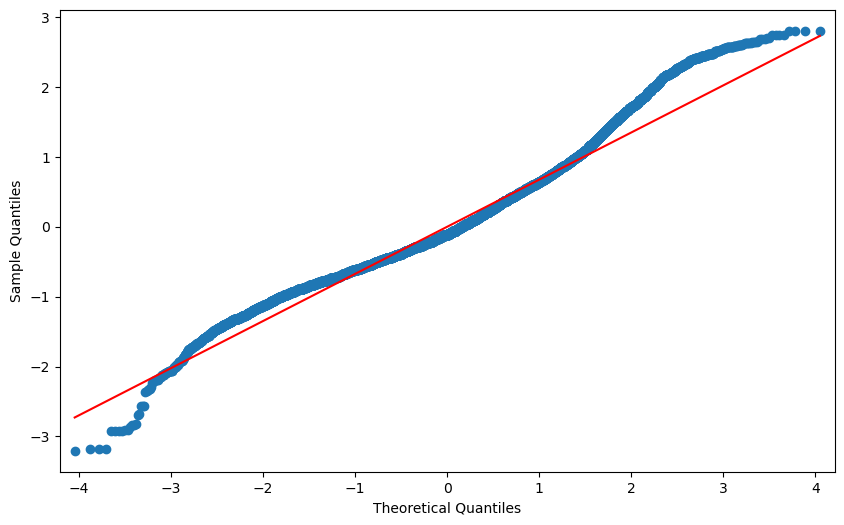

In [47]:
qqplot(model.resid,line="r")
plt.show()

In [48]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [49]:
# H0: Homoscadasticity
# Ha: Heteroscadasticity
het_breuschpagan(model.resid,sm.add_constant(xtrain))
# The data is not homoscadastic

(1620.0496811571754, 0.0, 112.66451448452781, 0.0)

<AxesSubplot:>

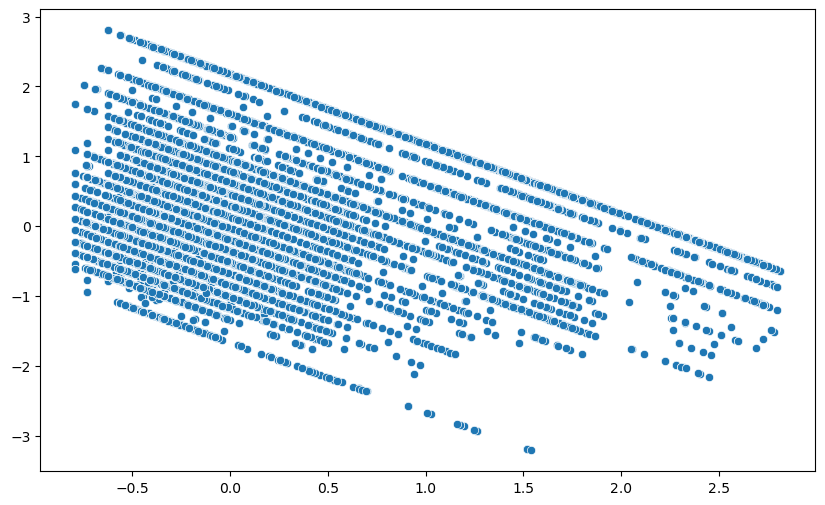

In [50]:
sns.scatterplot(model.fittedvalues,model.resid)
# Data is heteroscadastic

In [51]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [52]:
lr=LinearRegression()
model_lr=lr.fit(xtrain,ytrain)

In [53]:
update_performance(name="lr_base",model=model_lr)
perf_score
# This is an underfitting model

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.12373


In [54]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [55]:
rf=RandomForestRegressor()
model_rf=rf.fit(xtrain,ytrain)

In [56]:
update_performance(name="Random Forest",model=model_rf)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918


In [57]:
gbr=GradientBoostingRegressor()
model_gbr=gbr.fit(xtrain,ytrain)

In [58]:
update_performance(name="Gradient Boosting",model=model_gbr)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461


In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [60]:
lr=LinearRegression()
sfs_forward=sfs(estimator=lr,k_features=5,forward=True,scoring="neg_root_mean_squared_error")
sfs_forward.fit(xtrain,ytrain)
sfs_forward.k_feature_names_

('votes',
 'book_table_Yes',
 'listed_in(type)_Drinks & nightlife',
 'listed_in(type)_Pubs and bars',
 'Location_South')

In [61]:
X=scaled_df[["votes","book_table_Yes",'listed_in(type)_Drinks & nightlife','listed_in(type)_Pubs and bars',"Location_South"]]
Y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=10)

In [62]:
lr=LinearRegression()
model_lr_5sf=lr.fit(xtrain,ytrain)

In [63]:
update_performance(name="LR_best_5_forward",model=model_lr_5sf)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033


In [64]:
x=scaled_df.drop(columns=["approx_cost(for two people)"])
y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [65]:
lr=LinearRegression()
sfs_forward=sfs(estimator=lr,k_features=5,forward=False,scoring="neg_root_mean_squared_error")
sfs_forward.fit(xtrain,ytrain)
sfs_forward.k_feature_names_

('votes',
 'book_table_Yes',
 'listed_in(type)_Delivery',
 'listed_in(type)_Desserts',
 'listed_in(type)_Dine-out')

In [66]:
X=scaled_df[["votes","book_table_Yes",'listed_in(type)_Delivery','listed_in(type)_Desserts',"listed_in(type)_Dine-out"]]
Y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=10)

In [67]:
lr=LinearRegression()
model_lr_5sb=lr.fit(xtrain,ytrain)

In [68]:
update_performance(name="LR_best_5_backward",model=model_lr_5sf)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025


In [69]:
x=scaled_df.drop(columns=["approx_cost(for two people)"])
y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [70]:
lr=LinearRegression()
sfs_backward=sfs(estimator=lr,k_features=(5,15),forward=True,scoring="neg_root_mean_squared_error")
sfs_backward.fit(xtrain,ytrain)
sfs_forward.k_feature_names_

('votes',
 'book_table_Yes',
 'listed_in(type)_Delivery',
 'listed_in(type)_Desserts',
 'listed_in(type)_Dine-out')

In [71]:
X=scaled_df[["votes","book_table_Yes",'listed_in(type)_Delivery','listed_in(type)_Desserts',"listed_in(type)_Dine-out"]]
Y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=10)

In [72]:
lr=LinearRegression()
model_lr_best=lr.fit(xtrain,ytrain)

In [73]:
update_performance(name="LR_best_features",model=model_lr_5sf)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025


In [74]:
x=scaled_df.drop(columns=["approx_cost(for two people)"])
y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [75]:
from sklearn.feature_selection import RFE

In [76]:
lr=LinearRegression()
rfe=RFE(estimator=lr,n_features_to_select=5)
rfe.fit(xtrain,ytrain)
rfe.get_feature_names_out()

array(['book_table_Yes', 'listed_in(type)_Cafes',
       'listed_in(type)_Delivery', 'listed_in(type)_Desserts',
       'listed_in(type)_Dine-out'], dtype=object)

In [77]:
x=scaled_df.drop(columns=["approx_cost(for two people)",'book_table_Yes', 'listed_in(type)_Cafes',
       'listed_in(type)_Delivery', 'listed_in(type)_Desserts',
       'listed_in(type)_Dine-out'])
y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [78]:
lr=LinearRegression()
model_lr_rfe=lr.fit(xtrain,ytrain)

In [79]:
update_performance(name="LR_RFE",model=model_lr_rfe)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889


In [80]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [81]:
x=scaled_df.drop(columns=["approx_cost(for two people)"])
y=scaled_df["approx_cost(for two people)"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10)

In [82]:
lr=LinearRegression()
model_lr=lr.fit(xtrain,ytrain)
pred_train=model_lr.predict(xtrain)
pred_test=model_lr.predict(xtest)

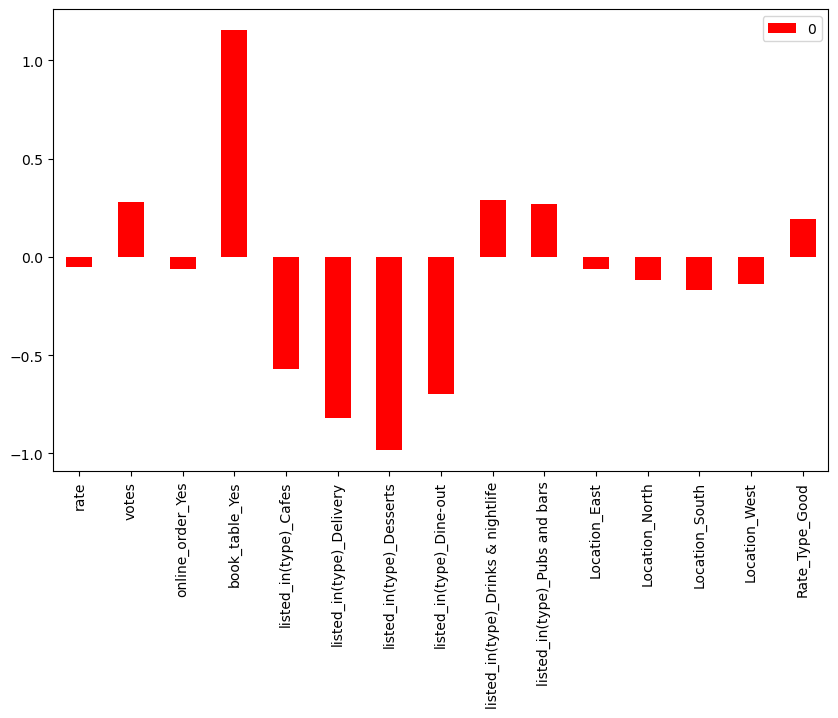

In [83]:
pd.DataFrame(model_lr.coef_,xtrain.columns).plot(kind="bar",color="Red")
plt.show()

In [84]:
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()

RMSE Train 0.6851523732178054
RMSE Test 0.6854806120842923


<AxesSubplot:>

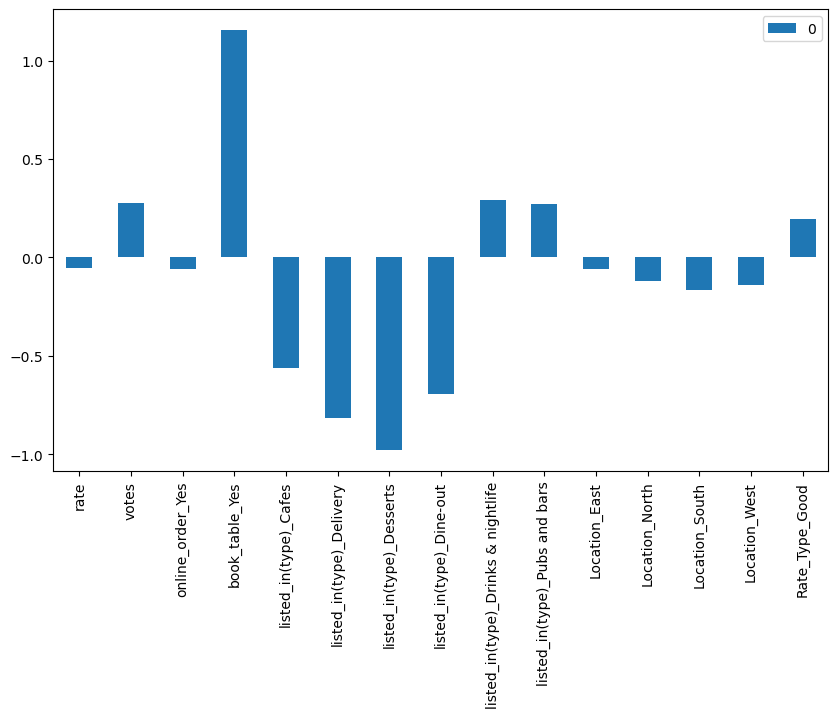

In [85]:
ridge_1a=Ridge(alpha=1,max_iter=500) # alpha is the penalizer
ridge_1a.fit(xtrain,ytrain)
pred_train=ridge_1a.predict(xtrain)
pred_test=ridge_1a.predict(xtest)
print("RMSE Train",mean_squared_error(ytrain,pred_train,squared=False))
print("RMSE Test",mean_squared_error(ytest,pred_test,squared=False))
pd.DataFrame(ridge_1a.coef_,xtrain.columns).plot(kind="bar")

RMSE Train 0.6851529620462558
RMSE Test 0.6854760936267075


<AxesSubplot:>

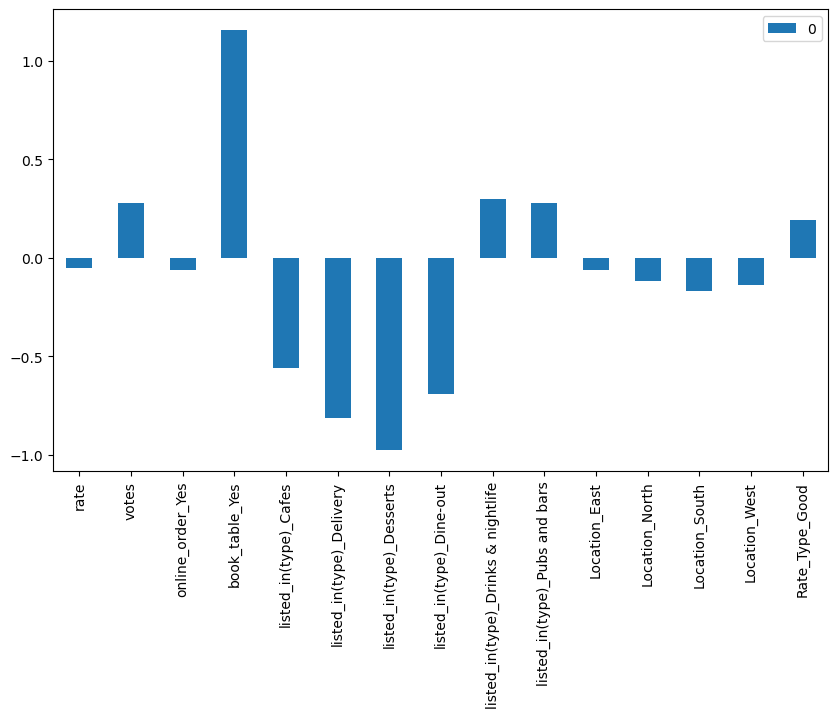

In [86]:
ridge_2a=Ridge(alpha=2,max_iter=500)
ridge_2a.fit(xtrain,ytrain)
pred_train=ridge_2a.predict(xtrain)
pred_test=ridge_2a.predict(xtest)
print("RMSE Train",mean_squared_error(ytrain,pred_train,squared=False))
print("RMSE Test",mean_squared_error(ytest,pred_test,squared=False))
pd.DataFrame(ridge_2a.coef_,xtrain.columns).plot(kind="bar")

In [87]:
update_performance(name="Ridge",model=ridge_1a,alpha=1)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070


In [88]:
update_performance(name="Ridge",model=ridge_2a,alpha=2)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498


<AxesSubplot:>

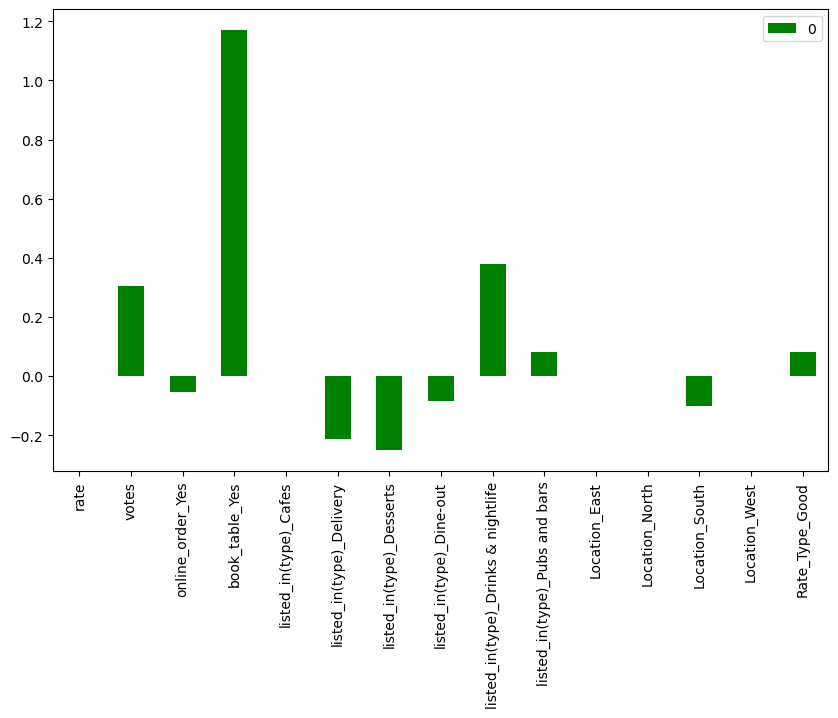

In [89]:
lasso=Lasso(alpha=0.01,max_iter=500)
lasso.fit(xtrain,ytrain)
pd.DataFrame(lasso.coef_,xtrain.columns).plot(kind='bar',color='green')

In [90]:
update_performance(name="Lasso",model=lasso,alpha=0.01)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


<AxesSubplot:>

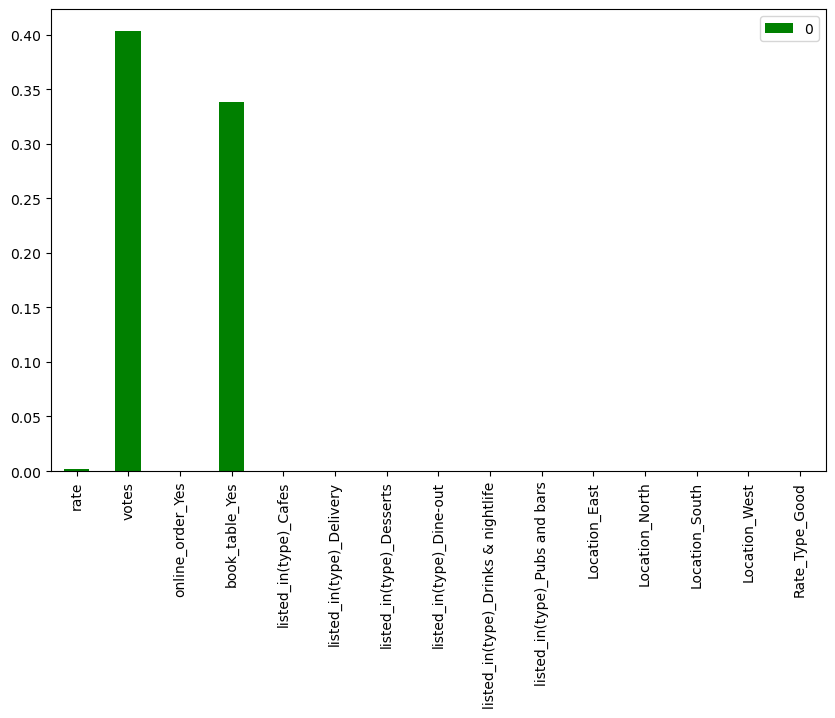

In [91]:
lasso=Lasso(alpha=0.1,max_iter=500)
lasso.fit(xtrain,ytrain)
pd.DataFrame(lasso.coef_,xtrain.columns).plot(kind='bar',color='green')

In [92]:
update_performance(name="Lasso",model=lasso,alpha=0.1)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


<AxesSubplot:>

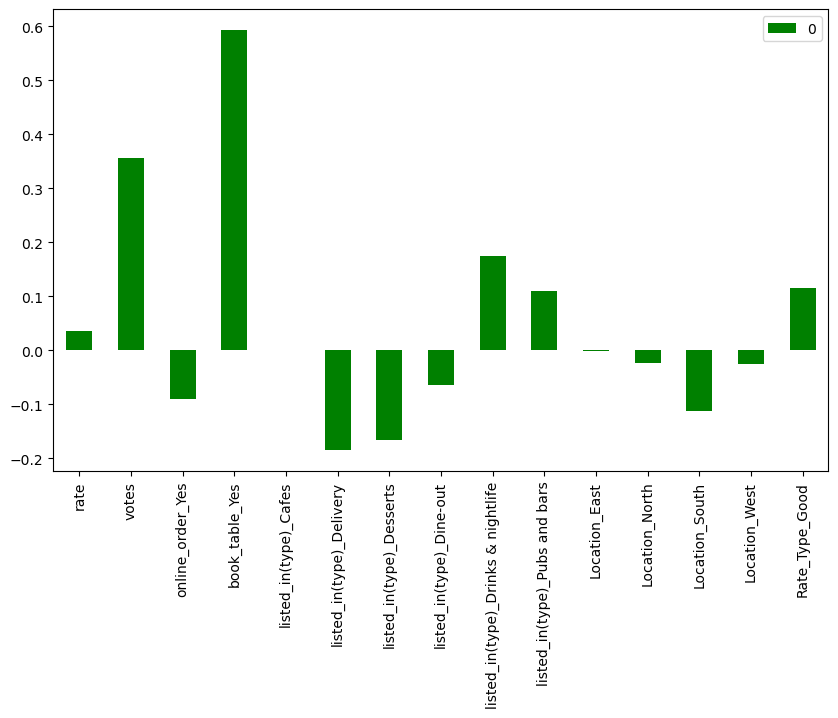

In [93]:
enet=ElasticNet(alpha=0.1,l1_ratio=0.01,max_iter=500)
enet.fit(xtrain,ytrain)
pd.DataFrame(enet.coef_,xtrain.columns).plot(kind='bar',color='green')

In [94]:
update_performance(name="Elastic Net",model=enet,alpha=0.1,l1_ratio=0.01)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


In [95]:
ridge=Ridge()
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})
grid_ridge=GridSearchCV(estimator=ridge,param_grid=params,scoring="r2",cv=5)
grid_ridge.fit(xtrain,ytrain)
grid_ridge.best_params_

{'alpha': 0.3}

In [96]:
update_performance(name="Ridge-Grid",model=grid_ridge,alpha=0.3)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


In [97]:
lasso=Lasso()
params=({'alpha':[0.01, 0.02, 0.05, 0.001,0.005,0.009,0.002,0.003,0.004,0.005,0.007,0.008,1,2]})
grid_lasso=GridSearchCV(estimator=lasso,param_grid=params,scoring="r2",cv=5)
grid_lasso.fit(xtrain,ytrain)
grid_lasso.best_params_

{'alpha': 0.001}

In [98]:
update_performance(name="Lasso-Grid",model=grid_lasso,alpha=0.001)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


In [99]:
enet=ElasticNet()
params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
         'alpha'   :[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10,12,15,20]
        })

grid_enet=GridSearchCV(estimator=enet,
                       param_grid=params,
                       scoring='r2',
                       cv=5)
grid_enet.fit(xtrain,ytrain)
grid_enet.best_params_

{'alpha': 0.1, 'l1_ratio': 0.001}

In [100]:
update_performance(name="Enet-Grid",model=grid_enet,alpha=0.1,l1_ratio=0.001)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


In [101]:
from sklearn.linear_model import SGDRegressor

In [102]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)

SGDRegressor()

In [103]:
update_performance(name = 'Stochastic GD L2', model =sgd, alpha='0.0001-lr',l1_ratio=0.15)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


In [104]:
sgd = SGDRegressor(penalty="l1") 
sgd.fit(xtrain,ytrain)
update_performance(name = 'Stochastic GD L1', model =sgd, alpha='0.0001-lr',l1_ratio=0.15) 
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,-,-,0.530312,0.530868,0.685152,0.685486,175.123730
1,Random Forest,-,-,0.802502,0.656834,0.444662,0.585849,164.716918
2,Gradient Boosting,-,-,0.573153,0.569703,0.653158,0.656501,170.810461
3,LR_best_5_forward,-,-,0.507519,0.511610,0.701580,0.699414,172.308033
4,LR_best_5_backward,-,-,-0.305917,0.510422,0.700789,0.700264,181.129025
5,LR_best_features,-,-,0.508628,0.510422,0.700789,0.700264,181.129025
6,LR_RFE,-,-,0.402731,0.399571,0.772623,0.775500,207.569889
7,Ridge,1,-,0.530312,0.530875,0.685152,0.685481,175.122070
8,Ridge,2,-,0.530311,0.530881,0.685153,0.685476,175.120498
9,Lasso,0.01,-,0.507426,0.509748,0.701646,0.700746,173.839954


In [ ]:
# The best model is the random forest regressor.